# Looking for features

Import necessary packages

In [2]:
import urllib2
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Use Apple stock as an example for web scraping

In [3]:
quote = "AAPL"
target_url = "https://finance.yahoo.com/quote/" + quote + "/key-statistics?p=" + quote
req = urllib2.Request(target_url)
response = urllib2.urlopen(req)
soup = BeautifulSoup(response, "lxml", from_encoding="utf-8")

rows = soup.find_all('tr')

for i, row_tag in enumerate(rows):
    print "\n-----this is {}-th table in the collection-----".format(i+1)
    print row_tag


-----this is 1-th table in the collection-----
<tr data-reactid="13"><td data-reactid="14"><span data-reactid="15">Market Cap (intraday)</span><!-- react-text: 16 --> <!-- /react-text --><!-- react-text: 17 --><!-- /react-text --><sup aria-label="Shares outstanding is taken from the most recently filed quarterly or annual report and Market Cap is calculated using shares outstanding." data-reactid="18">5</sup></td><td class="Fz(s) Fw(500) Ta(end)" data-reactid="19">876.79B</td></tr>

-----this is 2-th table in the collection-----
<tr data-reactid="20"><td data-reactid="21"><span data-reactid="22">Enterprise Value</span><!-- react-text: 23 --> <!-- /react-text --><!-- react-text: 24 --><!-- /react-text --><sup aria-label="Data derived from multiple sources or calculated by Yahoo Finance." data-reactid="25">3</sup></td><td class="Fz(s) Fw(500) Ta(end)" data-reactid="26">931.83B</td></tr>

-----this is 3-th table in the collection-----
<tr data-reactid="27"><td data-reactid="28"><span dat

Go through the company list that download from Yahoo Finance, and find all Symbols and sectors

In [4]:
target_data = "./companylist.csv"
companies= pd.read_csv(target_data, parse_dates = True)
#companies.head()

sectors = pd.DataFrame({'Symbol':companies.Symbol, 'Sector':companies.Sector})
sectors.head()

,Sector,Symbol
0,Finance,PIH
1,Finance,PIHPP
2,Finance,TURN
3,Consumer Services,FLWS
4,Finance,FCCY


Go through all stock prices that we calculated. stocksDF.csv incudes the profit for each overlay and already filtered 
out files less than 1kb.

In [5]:
stock_data = "./stocksDF.csv"
stocks = pd.read_csv(stock_data, parse_dates = True)
q = (stocks.Stock).tolist()
stock_name = []
for name in q:
    stock_name.append(name[9:-4])
stocks.Stock = stock_name
stocks.head()

,Unnamed: 0,Stock,Bollinger Band,Keltner Channel,Moving Average Envelope,Price Channel,Parabolic SAR
0,0,AABA,15043.738459,16600.638469,12736.918128,10341.580403,17439.426901
1,1,AAL,11108.857474,11018.047499,10865.407600,12330.150222,9973.041299
2,2,AAME,7790.656829,7687.106829,7103.146829,8425.800000,6835.231759
3,3,AAOI,15321.024519,15095.954540,13678.224585,11516.110904,12896.527605
4,4,AAON,10936.585902,10662.636008,11136.885881,11890.549614,10339.098558


Add sector column

In [6]:
sector_name = []
for each in stocks.Stock:
    for a in range(0, len(sectors.Symbol)):
        if(each == sectors.Symbol[a]):
            sector_name.append(sectors.Sector[a])

stock_feature = pd.DataFrame({'Quote':stocks.Stock, 'Sector':sector_name})
stock_feature.head()

,Quote,Sector
0,AABA,Technology
1,AAL,Transportation
2,AAME,Finance
3,AAOI,Technology
4,AAON,Capital Goods


In [7]:
stock_feature.set_index(np.arange(len(stock_feature.Sector)))
stock_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 2 columns):
Quote     2660 non-null object
Sector    2660 non-null object
dtypes: object(2)
memory usage: 41.6+ KB


In [8]:
prob = stock_feature['Sector'].value_counts(sort=True)
print prob

Health Care              541
Finance                  464
Technology               389
n/a                      342
Consumer Services        294
Capital Goods            158
Consumer Non-Durables     96
Miscellaneous             80
Consumer Durables         73
Basic Industries          72
Public Utilities          54
Energy                    52
Transportation            45
Name: Sector, dtype: int64


From above, we found that some sectors are missing, so we need to drop stocks

In [9]:
stock_feature = stock_feature[stock_feature.Sector != 'n/a']
prob = stock_feature['Sector'].value_counts(sort=True)
print prob
print "--------------------------"
stock_feature.reset_index(drop=True)
print stock_feature.info()

Health Care              541
Finance                  464
Technology               389
Consumer Services        294
Capital Goods            158
Consumer Non-Durables     96
Miscellaneous             80
Consumer Durables         73
Basic Industries          72
Public Utilities          54
Energy                    52
Transportation            45
Name: Sector, dtype: int64
--------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2318 entries, 0 to 2659
Data columns (total 2 columns):
Quote     2318 non-null object
Sector    2318 non-null object
dtypes: object(2)
memory usage: 54.3+ KB
None


In [10]:
stock_feature.set_index(np.arange(len(stock_feature.Sector)))

,Quote,Sector
0,AABA,Technology
1,AAL,Transportation
2,AAME,Finance
3,AAOI,Technology
4,AAON,Capital Goods
5,AAPL,Technology
6,AAWW,Transportation
7,AAXN,Capital Goods
8,ABAC,Consumer Non-Durables
9,ABAX,Capital Goods


In [11]:
# create the csv file

Start do the web scraping, for every stock in stock_feature dataframe

In [12]:
indicators = ['Market Cap', 'EV', 'P/E', 'PEG Ratio', 'P/S', 'P/B', 'ROA', 'ROE', 'Revenue', 'EBITDA', 'Diluted EPS',
             'Total Debt/Equity', 'Current Ratio', 'Beta', 'Shares Outstanding', '52-Week Change', 'Profit Margin', 
              'Operating Margin', 'Quarterly Revenue Growth']

indexes = [0, 1, 2, 4, 5, 6, 13, 14, 15, 19, 21, 26, 27, 31, 40, 32, 11, 12, 17]

market_cap = []
ev = []
p_e = []
peg_ratio = []
p_s = []
p_b = []
roa = []
roe = []
revenue = []
ebitda = []
diluted_eps = []
total_debt_equity = []
current_ratio = []
beta = []
shares_outstanding = []
week_change = []
profit_margin = []
operating_margin = []
q_revenue_growth = []
book_per_share = []
quote = []

data = [market_cap, ev, p_e, peg_ratio, p_s, p_b, roa, roe, revenue, ebitda, diluted_eps, total_debt_equity, 
        current_ratio, beta, shares_outstanding, week_change, profit_margin, operating_margin, q_revenue_growth]

In [13]:
for d in range(2101,len(stock_feature.index)):
    index = stock_feature.index[d]
    each = stock_name[index]
    quote.append(each)
    
    target_url = "https://finance.yahoo.com/quote/" + each + "/key-statistics?p=" + each
    req = urllib2.Request(target_url)
    response = urllib2.urlopen(req)
    soup = BeautifulSoup(response, "lxml", from_encoding="utf-8")
    rows = soup.find_all('tr')

    for a in range(0, len(indexes)):
        try:
            value = rows[indexes[a]].find_all('td')[1].text
            data[a].append(value)
        except:
            data[a].append('N/A')
        
info = {'Quote':quote, 'Market Cap':data[0], 'EV':data[1], 'P/E':data[2], 'PEG Ratio':data[3], 'P/S':data[4], 
        'P/B':data[5], 'ROA':data[6], 'ROE':data[7], 'Revenue':data[8], 'EBITDA':data[9], 'Diluted EPS':data[10],
        'Total Debt/Equity':data[11], 'Current Ratio':data[12], 'Beta':data[13], 'Shares Outstanding':data[14],
        'Week Change':data[15],'Profit Margin':data[16], 'Operating Margin':data[17], 'Qualterly Revenue Growth':data[18]}
    
df = pd.DataFrame(info)
df

,Beta,Current Ratio,Diluted EPS,EBITDA,EV,Market Cap,Operating Margin,P/B,P/E,P/S,PEG Ratio,Profit Margin,Qualterly Revenue Growth,Quote,ROA,ROE,Revenue,Shares Outstanding,Total Debt/Equity,Week Change
0,0.67,0.60,0.66,4M,77.83M,92.47M,1.87%,2.72,2.85,1.48,9.33,4.21%,0.30%,TST,0.99%,6.91%,62.47M,49.19M,N/A,149.33%
1,0.76,2.69,0.16,184.98M,1.73B,1.47B,8.15%,4.14,203.48,1.00,1.60,0.49%,23.70%,TTEC,7.82%,2.98%,1.48B,45.88M,94.81,6.71%
2,0.78,2.25,2.39,228.77M,3.12B,2.91B,8.86%,3.08,21.83,1.39,1.65,6.57%,11.30%,TTEK,6.14%,15.10%,2.09B,55.85M,47.29,24.02%
3,0.68,2.82,0.24,15.05M,536.19M,563.41M,9.59%,4.67,85.42,5.19,1.54,6.27%,13.60%,TTGT,3.79%,5.71%,108.56M,27.48M,26.69,118.51%
4,1.96,1.70,1.04,390.66M,2.18B,1.6B,8.13%,1.55,14.80,0.60,0.48,4.67%,4.60%,TTMI,5.12%,13.55%,2.66B,103.44M,96.90,-1.50%
5,1.48,1.86,-0.70,-14.09M,20.05M,20.57M,"-6,745.12%",24.25,N/A,95.66,N/A,0.00%,65.70%,TTNP,-65.75%,-203.69%,215k,21.2M,768.26,-67.67%
6,1.74,0.86,-1.94,-50.91M,251.4M,251.42M,"-1,154.14%",188.65,N/A,53.88,N/A,0.00%,82.70%,TTOO,-46.61%,-306.94%,4.67M,36.02M,"3,279.25",41.50%
7,3.50,7.96,-2.63,-115.28M,27.77M,162.12M,"-1,197.13%",1.24,N/A,16.77,-0.01,0.00%,131.90%,TTPH,-48.09%,-84.86%,9.67M,51.63M,N/A,-63.08%
8,1.28,1.70,0.21,54.72M,299.98M,312.91M,8.32%,2.18,28.71,0.91,1.57,3.14%,2.60%,TTS,6.69%,7.65%,344.6M,52.15M,19.18,-72.53%
9,1.63,1.18,1.63,239.99M,9.74B,11.52B,9.41%,8.18,61.82,6.02,1.01,9.51%,0.90%,TTWO,3.33%,16.38%,1.91B,114.33M,0.99,65.24%


Download all data from web scraping into partial_feature.csv. And read the file at the next cell.

In [14]:
target_data = "./partial_feature.csv"
features = pd.read_csv(target_data, parse_dates = True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 21 columns):
Quote                       2317 non-null object
Beta                        2213 non-null float64
Current Ratio               1970 non-null float64
Diluted EPS                 2272 non-null float64
EBITDA                      1923 non-null object
EV                          2282 non-null object
Market Cap                  2304 non-null object
Operating Margin            2300 non-null object
P/B                         2150 non-null object
P/E                         1267 non-null object
P/S                         2173 non-null object
PEG Ratio                   1389 non-null object
Profit Margin               2300 non-null object
Qualterly Revenue Growth    2099 non-null object
ROA                         2281 non-null object
ROE                         2168 non-null object
Revenue                     2179 non-null object
Shares Outstanding          2271 non-null object
Total De

Create another dataframe, convert categorial feature "Sector" into numeracal feature

In [15]:
prob = features['Sector'].value_counts(sort=True)
print prob

Health Care              540
Finance                  464
Technology               389
Consumer Services        294
Capital Goods            158
Consumer Non-Durables     96
Miscellaneous             80
Consumer Durables         73
Basic Industries          72
Public Utilities          54
Energy                    52
Transportation            45
Name: Sector, dtype: int64


In [16]:
health_care = []
finance = []
technology = []
consumer_services = []
capital_goods = []
consumer_non_durables = []
miscellaneous = []
consumer_durables = []
basic_industries = []
public_utilities = []
energy = []
transportation  = []

In [17]:
for each in features['Sector']:
    if(each == 'Health Care'):
        health_care.append(1)
    else:
        health_care.append(0)

for each in features['Sector']:
    if(each == 'Finance'):
        finance.append(1)
    else:
        finance.append(0)

for each in features['Sector']:
    if(each == 'Technology'):
        technology.append(1)
    else:
        technology.append(0)

for each in features['Sector']:
    if(each == 'Consumer Services'):
        consumer_services.append(1)
    else:
        consumer_services.append(0)

for each in features['Sector']:
    if(each == 'Capital Goods'):
        capital_goods.append(1)
    else:
        capital_goods.append(0)

for each in features['Sector']:
    if(each == 'Consumer Non-Durables'):
        consumer_non_durables.append(1)
    else:
        consumer_non_durables.append(0)

for each in features['Sector']:
    if(each == 'Miscellaneous'):
        miscellaneous.append(1)
    else:
        miscellaneous.append(0)

for each in features['Sector']:
    if(each == 'Consumer Durables'):
        consumer_durables.append(1)
    else:
        consumer_durables.append(0)

for each in features['Sector']:
    if(each == 'Basic Industries'):
        basic_industries.append(1)
    else:
        basic_industries.append(0)

for each in features['Sector']:
    if(each == 'Public Utilities'):
        public_utilities.append(1)
    else:
        public_utilities.append(0)

for each in features['Sector']:
    if(each == 'Energy'):
        energy.append(1)
    else:
        energy.append(0)

for each in features['Sector']:
    if(each == 'Transportation'):
        transportation.append(1)
    else:
        transportation.append(0)


In [18]:
sector_info = pd.DataFrame({'isHealthCase':health_care, 'isFinance':finance, 'isTechnology':technology, 
                            'isConsumerServices':consumer_services, 'isCapitalGoods':capital_goods, 
                            'isConsumerNonDurables':consumer_non_durables, 'isMiscellaneous':miscellaneous, 
                           'isConsumerDurables':consumer_durables, 'isBasicIndustries':basic_industries,
                           'isPublicUtilities':public_utilities, 'isEnergy':energy, 'isTransportation':transportation})
sector_info

,isBasicIndustries,isCapitalGoods,isConsumerDurables,isConsumerNonDurables,isConsumerServices,isEnergy,isFinance,isHealthCase,isMiscellaneous,isPublicUtilities,isTechnology,isTransportation
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0


Combine the numerical features of sector with the webscraping data

In [19]:
combined_df = pd.concat([features, sector_info], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 33 columns):
Quote                       2317 non-null object
Beta                        2213 non-null float64
Current Ratio               1970 non-null float64
Diluted EPS                 2272 non-null float64
EBITDA                      1923 non-null object
EV                          2282 non-null object
Market Cap                  2304 non-null object
Operating Margin            2300 non-null object
P/B                         2150 non-null object
P/E                         1267 non-null object
P/S                         2173 non-null object
PEG Ratio                   1389 non-null object
Profit Margin               2300 non-null object
Qualterly Revenue Growth    2099 non-null object
ROA                         2281 non-null object
ROE                         2168 non-null object
Revenue                     2179 non-null object
Shares Outstanding          2271 non-null object
Total De

Since 'P/E', 'Total Debt/Equity' and 'PEG Ratio' have too many null values, drop them from the dataframe

In [20]:
combined_df = combined_df.drop(['Total Debt/Equity'], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 32 columns):
Quote                       2317 non-null object
Beta                        2213 non-null float64
Current Ratio               1970 non-null float64
Diluted EPS                 2272 non-null float64
EBITDA                      1923 non-null object
EV                          2282 non-null object
Market Cap                  2304 non-null object
Operating Margin            2300 non-null object
P/B                         2150 non-null object
P/E                         1267 non-null object
P/S                         2173 non-null object
PEG Ratio                   1389 non-null object
Profit Margin               2300 non-null object
Qualterly Revenue Growth    2099 non-null object
ROA                         2281 non-null object
ROE                         2168 non-null object
Revenue                     2179 non-null object
Shares Outstanding          2271 non-null object
Week Cha

In [21]:
combined_df = combined_df.drop(['P/E'], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 31 columns):
Quote                       2317 non-null object
Beta                        2213 non-null float64
Current Ratio               1970 non-null float64
Diluted EPS                 2272 non-null float64
EBITDA                      1923 non-null object
EV                          2282 non-null object
Market Cap                  2304 non-null object
Operating Margin            2300 non-null object
P/B                         2150 non-null object
P/S                         2173 non-null object
PEG Ratio                   1389 non-null object
Profit Margin               2300 non-null object
Qualterly Revenue Growth    2099 non-null object
ROA                         2281 non-null object
ROE                         2168 non-null object
Revenue                     2179 non-null object
Shares Outstanding          2271 non-null object
Week Change                 2278 non-null object
Sector  

In [22]:
combined_df = combined_df.drop(['PEG Ratio'], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 30 columns):
Quote                       2317 non-null object
Beta                        2213 non-null float64
Current Ratio               1970 non-null float64
Diluted EPS                 2272 non-null float64
EBITDA                      1923 non-null object
EV                          2282 non-null object
Market Cap                  2304 non-null object
Operating Margin            2300 non-null object
P/B                         2150 non-null object
P/S                         2173 non-null object
Profit Margin               2300 non-null object
Qualterly Revenue Growth    2099 non-null object
ROA                         2281 non-null object
ROE                         2168 non-null object
Revenue                     2179 non-null object
Shares Outstanding          2271 non-null object
Week Change                 2278 non-null object
Sector                      2317 non-null object
isBasicI

Drop 'Sector' from the dataframe

In [23]:
combined_df = combined_df.drop(['Sector'], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 29 columns):
Quote                       2317 non-null object
Beta                        2213 non-null float64
Current Ratio               1970 non-null float64
Diluted EPS                 2272 non-null float64
EBITDA                      1923 non-null object
EV                          2282 non-null object
Market Cap                  2304 non-null object
Operating Margin            2300 non-null object
P/B                         2150 non-null object
P/S                         2173 non-null object
Profit Margin               2300 non-null object
Qualterly Revenue Growth    2099 non-null object
ROA                         2281 non-null object
ROE                         2168 non-null object
Revenue                     2179 non-null object
Shares Outstanding          2271 non-null object
Week Change                 2278 non-null object
isBasicIndustries           2317 non-null int64
isCapital

Drop all null values from dataframe

In [24]:
combined_df = combined_df.dropna(axis=0, how='any')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 2315
Data columns (total 29 columns):
Quote                       1560 non-null object
Beta                        1560 non-null float64
Current Ratio               1560 non-null float64
Diluted EPS                 1560 non-null float64
EBITDA                      1560 non-null object
EV                          1560 non-null object
Market Cap                  1560 non-null object
Operating Margin            1560 non-null object
P/B                         1560 non-null object
P/S                         1560 non-null object
Profit Margin               1560 non-null object
Qualterly Revenue Growth    1560 non-null object
ROA                         1560 non-null object
ROE                         1560 non-null object
Revenue                     1560 non-null object
Shares Outstanding          1560 non-null object
Week Change                 1560 non-null object
isBasicIndustries           1560 non-null int64
isCapital

We need to convert all those features with the dtype of object into numbers, except 'Quote'

In [25]:
def convertBillion(num):
    num = num.replace('B', '0')
    n = float(num)*1000000000
    return n

def convertMillion(num):
    num = num.replace('M', '0')
    n = float(num)*1000000
    return n

def convertPercent(num):
    num = num.replace('%', '0')
    n = float(num)/100
    return n

def convert(X):
    num = str(X)
    num = num.replace(',', '')
    if num.find('B') != -1:
        convertion = convertBillion(num)
    elif num.find('M') != -1:
        convertion = convertMillion(num)
    elif num.find('%') != -1:
        convertion = convertPercent(num)
    else:
        convertion = float(num)
    return convertion

In [26]:
column_name = list(combined_df.columns.values)
print column_name

['Quote', 'Beta', 'Current Ratio', 'Diluted EPS', 'EBITDA', 'EV', 'Market Cap', 'Operating Margin', 'P/B', 'P/S', 'Profit Margin', 'Qualterly Revenue Growth', 'ROA', 'ROE', 'Revenue', 'Shares Outstanding', 'Week Change', 'isBasicIndustries', 'isCapitalGoods', 'isConsumerDurables', 'isConsumerNonDurables', 'isConsumerServices', 'isEnergy', 'isFinance', 'isHealthCase', 'isMiscellaneous', 'isPublicUtilities', 'isTechnology', 'isTransportation']


In [27]:
ev = []
ebitda = []
operating_margin = []
market_cap = []

for a in range(0, len(combined_df.EV)):
    b = combined_df['EV'].index[a]
    try:
        ev.append(convert(combined_df.EV[b]))
    except:
        ev.append(np.NaN)
combined_df.EV = ev

for a in range(0, len(combined_df.EBITDA)):
    b = combined_df['EBITDA'].index[a]
    try:
        ebitda.append(convert(combined_df.EBITDA[b]))
    except:
        ebitda.append(np.NaN)
combined_df.EBITDA = ebitda

for a in range(0, len(combined_df['Operating Margin'])):
    b = combined_df['Operating Margin'].index[a]
    try:
        operating_margin.append(convert(combined_df['Operating Margin'][b]))
    except:
        operating_margin.append(np.NaN)
combined_df['Operating Margin'] = operating_margin

for a in range(0, len(combined_df['Market Cap'])):
    b = combined_df['Market Cap'].index[a]
    try:
        market_cap.append(convert(combined_df['Market Cap'][b]))
    except:
        market_cap.append(np.NaN)
combined_df['Market Cap'] = market_cap

In [28]:
p_s = []
p_b = []
roa = []
roe = []
profit_margin = []

for a in range(0, len(combined_df['P/S'])):
    b = combined_df['P/S'].index[a]
    try:
        p_s.append(convert(combined_df['P/S'][b]))
    except:
        p_s.append(np.NaN)
combined_df['P/S'] = p_s

for a in range(0, len(combined_df['P/B'])):
    b = combined_df['P/B'].index[a]
    try:
        p_b.append(convert(combined_df['P/B'][b]))
    except:
        p_b.append(np.NaN)
combined_df['P/B'] = p_b

for a in range(0, len(combined_df['ROA'])):
    b = combined_df['ROA'].index[a]
    try:
        roa.append(convert(combined_df['ROA'][b]))
    except:
        roa.append(np.NaN)
combined_df['ROA'] = roa

for a in range(0, len(combined_df['ROE'])):
    b = combined_df['ROE'].index[a]
    try:
        roe.append(convert(combined_df['ROE'][b]))
    except:
        roe.append(np.NaN)
combined_df['ROE'] = roe

for a in range(0, len(combined_df['Profit Margin'])):
    b = combined_df['Profit Margin'].index[a]
    try:
        profit_margin.append(convert(combined_df['Profit Margin'][b]))
    except:
        profit_margin.append(np.NaN)
combined_df['Profit Margin'] = profit_margin

In [29]:
revenue = []
shares_outstanding = []
week_change = []
q_revenue_growth = []

for a in range(0, len(combined_df['Revenue'])):
    b = combined_df['Revenue'].index[a]
    try:
        revenue.append(convert(combined_df['Revenue'][b]))
    except:
        revenue.append(np.NaN)
combined_df['Revenue'] = revenue

for a in range(0, len(combined_df['Shares Outstanding'])):
    b = combined_df['Shares Outstanding'].index[a]
    try:
        shares_outstanding.append(convert(combined_df['Shares Outstanding'][b]))
    except:
        shares_outstanding.append(np.NaN)
combined_df['Shares Outstanding'] = shares_outstanding

for a in range(0, len(combined_df['Week Change'])):
    b = combined_df['Week Change'].index[a]
    try:
        week_change.append(convert(combined_df['Week Change'][b]))
    except:
        week_change.append(np.NaN)
combined_df['Week Change'] = shares_outstanding

for a in range(0, len(combined_df['Qualterly Revenue Growth'])):
    b = combined_df['Qualterly Revenue Growth'].index[a]
    try:
        q_revenue_growth.append(convert(combined_df['Qualterly Revenue Growth'][b]))
    except:
        q_revenue_growth.append(np.NaN)
combined_df['Qualterly Revenue Growth'] = q_revenue_growth

combined_df

,Quote,Beta,Current Ratio,Diluted EPS,EBITDA,EV,Market Cap,Operating Margin,P/B,P/S,...,isConsumerDurables,isConsumerNonDurables,isConsumerServices,isEnergy,isFinance,isHealthCase,isMiscellaneous,isPublicUtilities,isTechnology,isTransportation
0,AABA,1.98,17.07,29.960,6.650000e+06,5.905000e+10,6.316000e+10,0.1221,0.95,1159.80,...,0,0,0,0,0,0,0,0,1,0
1,AAL,1.27,0.61,3.900,6.790000e+09,4.170000e+10,2.260000e+10,0.1130,5.78,0.54,...,0,0,0,0,0,0,0,0,0,1
2,AAME,0.77,1.21,0.200,8.520000e+06,7.366000e+07,6.324000e+07,0.0391,0.56,0.35,...,0,0,0,0,1,0,0,0,0,0
3,AAOI,1.22,3.25,3.670,1.073300e+08,5.553100e+08,5.516700e+08,0.2274,1.65,1.44,...,0,0,0,0,0,0,0,0,1,0
4,AAON,0.67,3.07,1.030,8.988000e+07,1.820000e+09,1.900000e+09,0.1848,7.99,4.68,...,0,0,0,0,0,0,0,0,0,0
5,AAPL,1.10,1.24,9.700,7.417000e+10,9.318300e+11,9.023600e+11,0.2687,6.45,3.77,...,0,0,0,0,0,0,0,0,1,0
6,AAWW,1.63,0.80,8.650,4.381100e+08,3.540000e+09,1.620000e+09,0.1143,0.90,0.75,...,0,0,0,0,0,0,0,0,0,1
7,AAXN,0.76,1.90,0.100,2.206000e+07,2.190000e+09,2.280000e+09,0.0408,13.52,6.63,...,0,0,0,0,0,0,0,0,0,0
8,ABAC,2.20,19.52,0.110,4.300000e+06,-4.037000e+07,2.036000e+07,0.0393,0.23,0.75,...,0,1,0,0,0,0,0,0,0,0
9,ABAX,2.15,5.92,1.080,4.556000e+07,1.510000e+09,1.670000e+09,0.1601,5.93,7.09,...,0,0,0,0,0,0,0,0,0,0


In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 2315
Data columns (total 29 columns):
Quote                       1560 non-null object
Beta                        1560 non-null float64
Current Ratio               1560 non-null float64
Diluted EPS                 1560 non-null float64
EBITDA                      1505 non-null float64
EV                          1558 non-null float64
Market Cap                  1560 non-null float64
Operating Margin            1560 non-null float64
P/B                         1560 non-null float64
P/S                         1560 non-null float64
Profit Margin               1560 non-null float64
Qualterly Revenue Growth    1560 non-null float64
ROA                         1560 non-null float64
ROE                         1560 non-null float64
Revenue                     1515 non-null float64
Shares Outstanding          1560 non-null float64
Week Change                 1560 non-null float64
isBasicIndustries           1560 non-null in

In [31]:
combined_df = combined_df.dropna(axis=0, how='any')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 2315
Data columns (total 29 columns):
Quote                       1459 non-null object
Beta                        1459 non-null float64
Current Ratio               1459 non-null float64
Diluted EPS                 1459 non-null float64
EBITDA                      1459 non-null float64
EV                          1459 non-null float64
Market Cap                  1459 non-null float64
Operating Margin            1459 non-null float64
P/B                         1459 non-null float64
P/S                         1459 non-null float64
Profit Margin               1459 non-null float64
Qualterly Revenue Growth    1459 non-null float64
ROA                         1459 non-null float64
ROE                         1459 non-null float64
Revenue                     1459 non-null float64
Shares Outstanding          1459 non-null float64
Week Change                 1459 non-null float64
isBasicIndustries           1459 non-null in

Download the combined_df dataframe, with has all features into features.csv

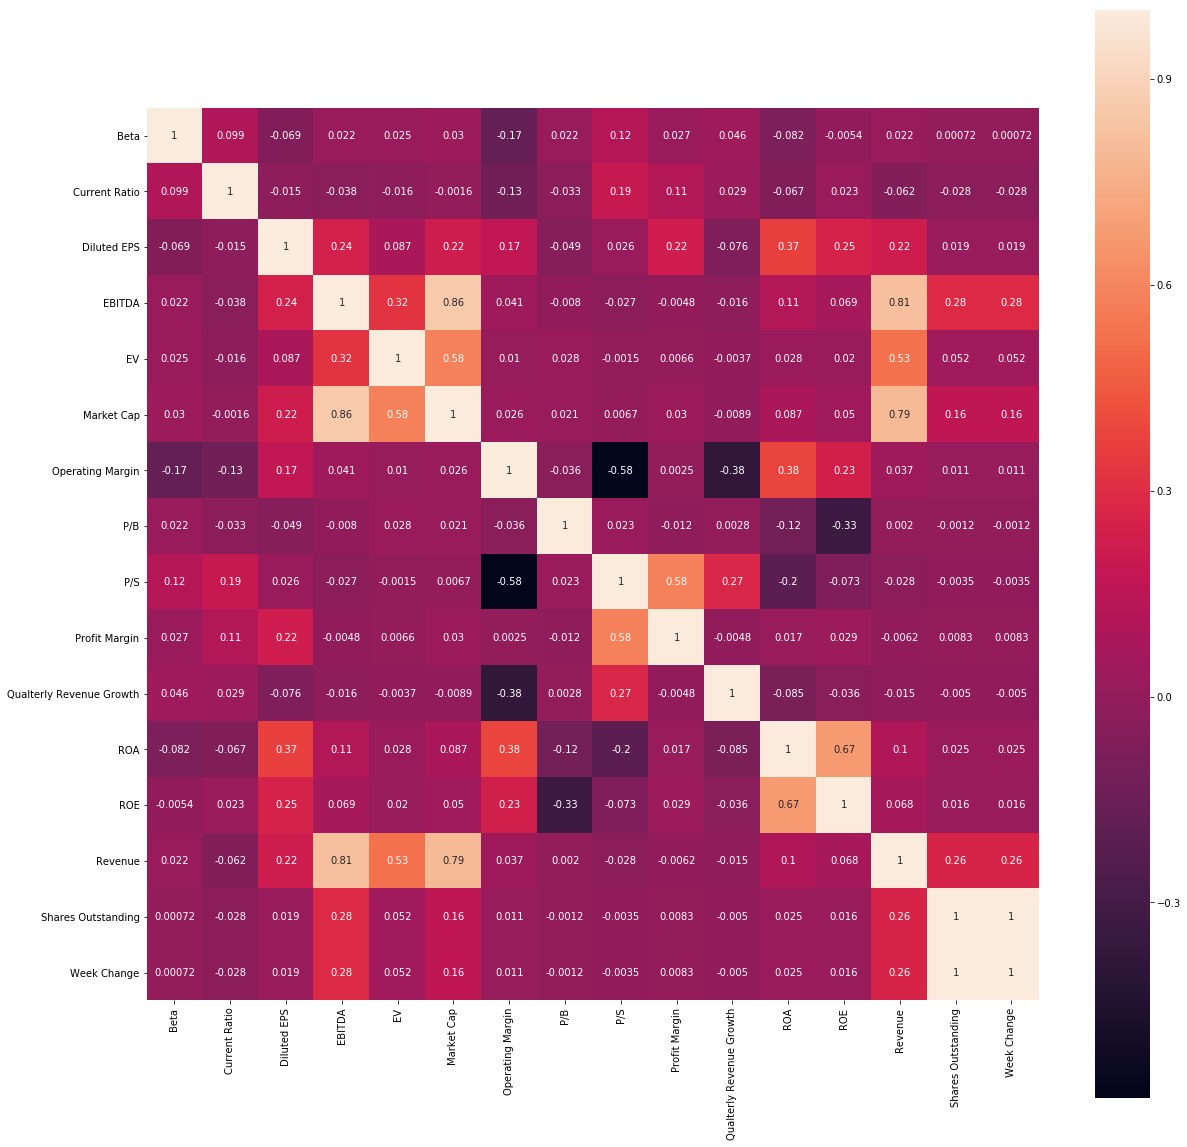

In [37]:
cols = combined_df.columns[1:-12]
plt.subplots(figsize=(20,20))
sns.heatmap(combined_df[cols].corr(), annot=True, square=True, vmax=1)

In [40]:
combined_df = combined_df.drop(['Shares Outstanding'], axis=1)
combined_df.info()

ValueError: labels ['Shares Outstanding'] not contained in axis

In [41]:
combined_df = combined_df.drop(['Market Cap'], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 2315
Data columns (total 27 columns):
Quote                       1459 non-null object
Beta                        1459 non-null float64
Current Ratio               1459 non-null float64
Diluted EPS                 1459 non-null float64
EBITDA                      1459 non-null float64
EV                          1459 non-null float64
Operating Margin            1459 non-null float64
P/B                         1459 non-null float64
P/S                         1459 non-null float64
Profit Margin               1459 non-null float64
Qualterly Revenue Growth    1459 non-null float64
ROA                         1459 non-null float64
ROE                         1459 non-null float64
Revenue                     1459 non-null float64
Week Change                 1459 non-null float64
isBasicIndustries           1459 non-null int64
isCapitalGoods              1459 non-null int64
isConsumerDurables          1459 non-null int64


In [45]:
combined_df = combined_df.drop(['Revenue'], axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 2315
Data columns (total 26 columns):
Quote                       1459 non-null object
Beta                        1459 non-null float64
Current Ratio               1459 non-null float64
Diluted EPS                 1459 non-null float64
EBITDA                      1459 non-null float64
EV                          1459 non-null float64
Operating Margin            1459 non-null float64
P/B                         1459 non-null float64
P/S                         1459 non-null float64
Profit Margin               1459 non-null float64
Qualterly Revenue Growth    1459 non-null float64
ROA                         1459 non-null float64
ROE                         1459 non-null float64
Week Change                 1459 non-null float64
isBasicIndustries           1459 non-null int64
isCapitalGoods              1459 non-null int64
isConsumerDurables          1459 non-null int64
isConsumerNonDurables       1459 non-null int64
is

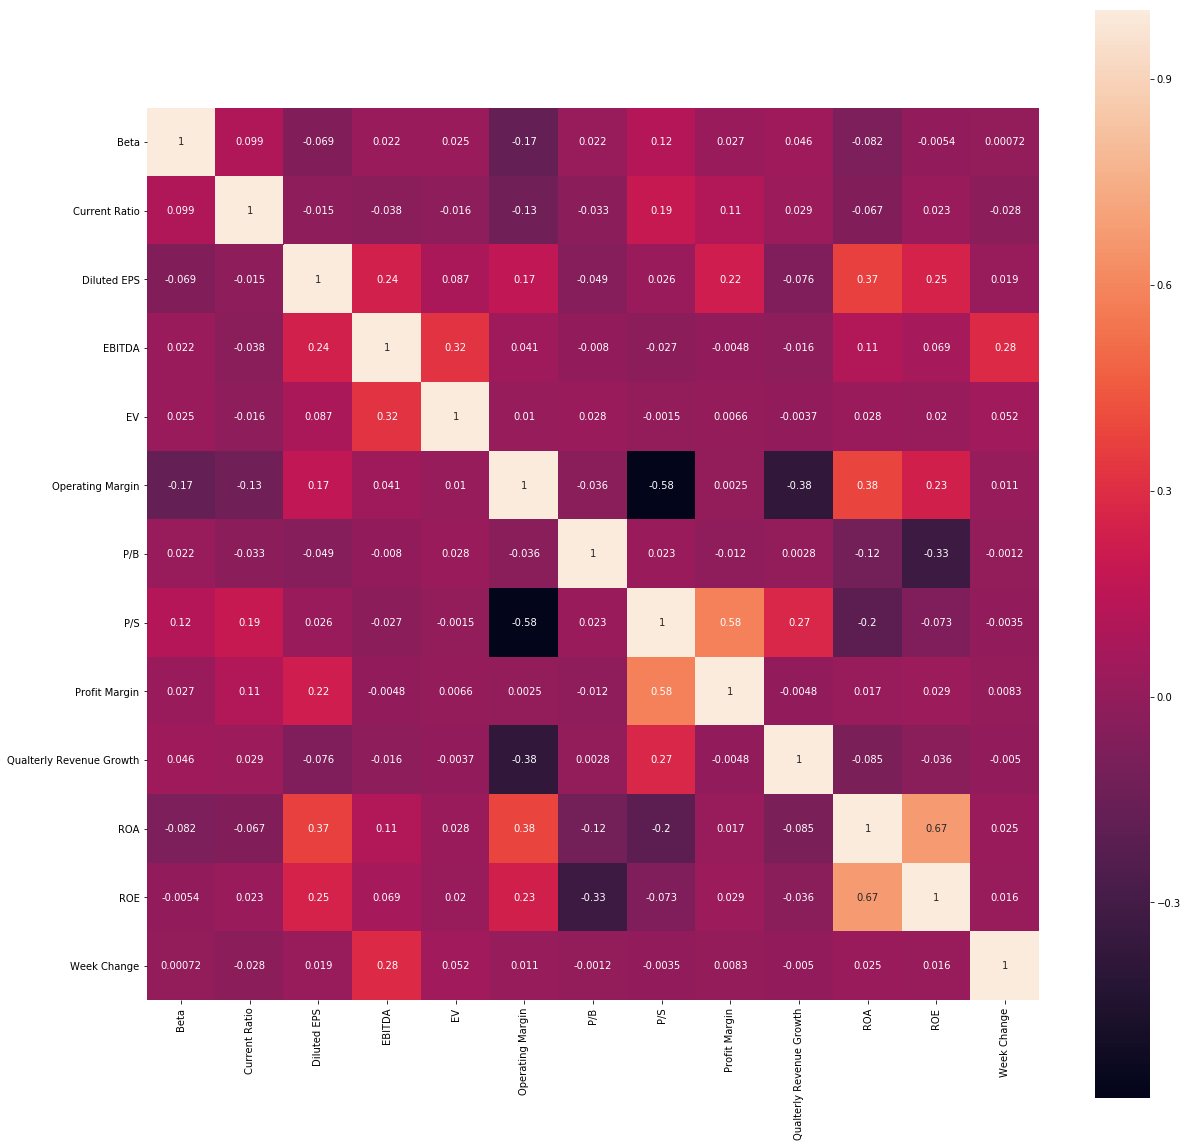

In [46]:
cols = combined_df.columns[1:-12]
plt.subplots(figsize=(20,20))
sns.heatmap(combined_df[cols].corr(), annot=True, square=True, vmax=1)

In [47]:
#combined_df.to_csv('features.csv')